In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# References

## Understanding Interactions Among Genetic Algorithm Parameters
https://books.google.co.uk/books?hl=en&lr=&id=lz7zqHVCDpcC&oi=fnd&pg=PA265&dq=determinants+of+genetic+algorithm+performance&ots=1JB3cf7U7a&sig=7lYOXjsE0nEiM3r_ZfLhcdR9oeQ#v=onepage&q&f=false

## Determining Relative Importance and Eﬀective Settings for Genetic Algorithm Control Parameters
https://www.nist.gov/system/files/documents/itl/antd/p992-single.pdf


Hamming Cliffs?
Hamming walls

No free lunch theorem

orthogonal fractional factorial (OFF) Design

## Evolving Solutions With Genetic Algorithms
https://medium.com/@LeonFedden/evolving-solutions-with-genetic-algorithms-e3122473a35f

## Tuning Genetic Algorithm Parameters using Design of Experiments
http://www0.cs.ucl.ac.uk/staff/W.Langdon/gecco2020/companion_files/wksp176s2-file1.pdf


## Tuning Genetic Algorithm Parameters to Improve Convergence Time
https://onlinelibrary.wiley.com/doi/full/10.1155/2011/646917

## Optimization of Control Parameters for Genetic Algorithms
https://ieeexplore.ieee.org/stamp/stamp.jsp?tp=&arnumber=4075583

## Statistical Analysis of the Main Parameters Involved in the Design of a Genetic Algorithm
https://ieeexplore.ieee.org/stamp/stamp.jsp?tp=&arnumber=1009128

## Adaptation of genetic algorithm parameters based on fuzzy logic controllers
https://www.academia.edu/2932538/Adaptation_of_genetic_algorithm_parameters_based_on_fuzzy_logic_controllers

## Operator and parameter adaptation in genetic algorithms
https://link.springer.com/article/10.1007/s005000050009



In [ ]:
pcross_df = pd.read_csv('GA_log/trace-pcross.csv')

# Compare Convergence and Fitness values to eachother

In [ ]:

fig, axs = plt.subplots(3, 3, figsize=(14, 8))
fig.suptitle("Avg Fitness & Avg Convergence over Time in Crossover Chance Experiments")

for ax, experiment in zip(axs.flat, pcross_df['ExperimentName'].drop_duplicates()):
    ax.set_title(experiment)
    df_filtered = pcross_df[pcross_df['ExperimentName'] == experiment]
    iterations = df_filtered['It']
    avg_best_fitness = df_filtered['AveBestFitness']
    avg_convergence = df_filtered['AvgConvergence']

    color = 'tab:red'
    ax.set_xlabel('Iterations')

    ax.set_ylabel('Fitness', color=color)
    ax.plot(iterations, avg_best_fitness, color=color)
    ax.tick_params(axis='y', labelcolor=color)

    ax2 = ax.twinx()
    color = 'tab:blue'
    ax2.set_ylabel('Convergence', color=color)
    ax2.plot(iterations, avg_convergence, color=color)
    ax2.tick_params(axis='y', labelcolor=color)

    ax.set_yscale('log')
    ax2.set_yscale('log')

fig.tight_layout()
plt.show()

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 8), sharex=True)
fig.suptitle("Avg Fitness & Avg Convergence over Time in Crossover Chance Experiments")

for experiment in pcross_df['ExperimentName'].drop_duplicates():
    df_filtered = pcross_df[pcross_df['ExperimentName'] == experiment]
    iterations = df_filtered['It']
    avg_best_fitness = df_filtered['AveBestFitness']
    avg_convergence = df_filtered['AvgConvergence']

    # Plot fitness
    ax1.plot(iterations, avg_best_fitness, label=experiment)
    # Plot convergence
    ax2.plot(iterations, avg_convergence, label=experiment)

# Layout adjustments
ax1.set_ylabel('Fitness (=> 0)')
ax1.set_title('Avg Best Fitness over Time grouped by experiment')
ax1.legend()
ax1.grid(True)
ax1.set_yscale('log')

ax2.set_ylabel('Convergence (=> 0)')
ax2.set_title('Avg Convergence over Time grouped by experiment')
ax2.legend()
ax2.grid(True)
ax2.set_yscale('log')

fig.tight_layout()
plt.show()

# Display Fitness values with confidence intervals of 95%

In [ ]:
fig, axs = plt.subplots(3, 3, figsize=(14, 8))
fig.suptitle("Avg Fitness & Avg Convergence over Time in Crossover Chance Experiments")

for ax, experiment in zip(axs.flat, pcross_df['ExperimentName'].drop_duplicates()):
    ax.set_title(experiment)
    df_filtered = pcross_df[pcross_df['ExperimentName'] == experiment]
    iterations = df_filtered['It']
    avg_best_fitness = df_filtered['AveBestFitness']
    confidence_interval = df_filtered['ConfidenceInterval']

    color = 'tab:red'
    ax.set_xlabel('Iterations')

    ax.set_ylabel('Fitness')
    ax.plot(iterations, avg_best_fitness)
    ax.fill_between(iterations, (avg_best_fitness-confidence_interval), (avg_best_fitness+confidence_interval), alpha=.1)
    ax.grid(True)
    ax.set_yscale('log')


fig.tight_layout()
plt.show()

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(14, 8))
fig.suptitle("Avg Fitness over Time with 95 % Confidence Intervals in Crossover Chance Experiments")

for experiment in pcross_df['ExperimentName'].drop_duplicates():
    df_filtered = pcross_df[pcross_df['ExperimentName'] == experiment]
    iterations = df_filtered['It']
    avg_best_fitness = df_filtered['AveBestFitness']
    confidence_interval = df_filtered['ConfidenceInterval']

    # Plot fitness
    ax.plot(iterations, avg_best_fitness, label=experiment)
    # Plot confidence
    ax.fill_between(iterations, (avg_best_fitness-confidence_interval), (avg_best_fitness+confidence_interval), alpha=.1)

fig.tight_layout()
ax.legend()
ax.set_yscale('log')
plt.setp(axs, ylim=(.1, 200))
plt.show()


# Now we plot only the 3 best for the experiment pcross .7,.8,.9

In [ ]:
plt.show()
fig, ax = plt.subplots(1, 1, figsize=(14, 8))
fig.suptitle("Avg Fitness over Time with 95 % Confidence Intervals in Crossover Chance Experiments")


for experiment in ['pcross=0.7', 'pcross=0.8', 'pcross=0.9']:
    df_filtered = pcross_df[pcross_df['ExperimentName'] == experiment]
    iterations = df_filtered['It']
    avg_best_fitness = df_filtered['AveBestFitness']
    confidence_interval = df_filtered['ConfidenceInterval']

    # Plot fitness
    ax.plot(iterations, avg_best_fitness, label=experiment)
    # Plot confidence
    ax.fill_between(iterations, (avg_best_fitness - confidence_interval), (avg_best_fitness + confidence_interval),
                    alpha=.1)

fig.tight_layout()
ax.legend()
ax.set_yscale('log')
plt.setp(axs, ylim=(.1, 200))
plt.show()

# PMut Individuals Experiments

In [ ]:
pmut_ind_df = pd.read_csv('GA_log/trace-pmut_ind.csv')


In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 8), sharex=True)
fig.suptitle("Avg Fitness & Avg Convergence over Time in Individual Mutation Experiments")

for experiment in pmut_ind_df['ExperimentName'].drop_duplicates():
    df_filtered = pmut_ind_df[pmut_ind_df['ExperimentName'] == experiment]
    iterations = df_filtered['It']
    avg_best_fitness = df_filtered['AveBestFitness']
    avg_convergence = df_filtered['AvgConvergence']

    # Plot fitness
    ax1.plot(iterations, avg_best_fitness, label=experiment)
    # Plot convergence
    ax2.plot(iterations, avg_convergence, label=experiment)

# Layout adjustments
ax1.set_ylabel('Fitness (=> 0)')
ax1.set_title('Avg Best Fitness over Time grouped by experiment')
ax1.legend()
ax1.grid(True)
ax1.set_yscale('log')

ax2.set_ylabel('Convergence (=> 0)')
ax2.set_title('Avg Convergence over Time grouped by experiment')
ax2.legend()
ax2.grid(True)
ax2.set_yscale('log')

fig.tight_layout()
plt.show()

In [ ]:
fig, axs = plt.subplots(3, 2, figsize=(14, 8))
fig.suptitle("Avg Fitness & Avg Convergence over Time in Individual Mutation Experiments")

for ax, experiment in zip(axs.flat, pmut_ind_df['ExperimentName'].drop_duplicates()):
    ax.set_title(experiment)
    df_filtered = pmut_ind_df[pmut_ind_df['ExperimentName'] == experiment]
    iterations = df_filtered['It']
    avg_best_fitness = df_filtered['AveBestFitness']
    confidence_interval = df_filtered['ConfidenceInterval']

    color = 'tab:red'
    ax.set_xlabel('Iterations')

    ax.set_ylabel('Fitness')
    ax.plot(iterations, avg_best_fitness)
    ax.fill_between(iterations, (avg_best_fitness-confidence_interval), (avg_best_fitness+confidence_interval), alpha=.1)
    ax.grid(True)
    ax.set_yscale('log')


fig.tight_layout()
plt.show()

# Conclusion of the first few experiments
When using default values, the higher the crossover chance and inidivudals mutation chance the better result we achieve.
One thing to note is that although we track crossover chances so far we have not seen any correlation between the fitness and the convergence/similarity of individuals in one experiment.

As expected although we see a strong inverse correlation with the convergence and the ind-mutation chance. Even so increasing the mutation chance seems to consistently give a better result than lower mutation chances, although the difference between individuals drops off at around pmut-ind == .7

The reason for the ever better fitness score with increased mutation and crossover chance is due to the high level of local optima in the rastrigin function.

# PMut Gene Analysis

In [ ]:
pmut_gene_df = pd.read_csv('GA_log/trace-pmut_gene.csv')

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 8), sharex=True)
fig.suptitle("Avg Fitness & Avg Convergence over Time in Gene Mutation Experiments")

for experiment in pmut_gene_df['ExperimentName'].drop_duplicates():
    df_filtered = pmut_gene_df[pmut_gene_df['ExperimentName'] == experiment]
    iterations = df_filtered['It']
    avg_best_fitness = df_filtered['AveBestFitness']
    avg_convergence = df_filtered['AvgConvergence']

    # Plot fitness
    ax1.plot(iterations, avg_best_fitness, label=experiment)
    # Plot convergence
    ax2.plot(iterations, avg_convergence, label=experiment)

# Layout adjustments
ax1.set_ylabel('Fitness (=> 0)')
ax1.set_title('Avg Best Fitness over Time grouped by experiment')
ax1.legend()
ax1.grid(True)
ax1.set_yscale('log')

ax2.set_ylabel('Convergence (=> 0)')
ax2.set_title('Avg Convergence over Time grouped by experiment')
ax2.legend()
ax2.grid(True)
ax2.set_yscale('log')

fig.tight_layout()
plt.show()

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(14, 8))
fig.suptitle("Avg Fitness & Avg Convergence over Time in Gene Mutation Experiments")

for ax, experiment in zip(axs.flat, pmut_gene_df['ExperimentName'].drop_duplicates()):
    ax.set_title(experiment)
    df_filtered = pmut_gene_df[pmut_gene_df['ExperimentName'] == experiment]
    iterations = df_filtered['It']
    avg_best_fitness = df_filtered['AveBestFitness']
    confidence_interval = df_filtered['ConfidenceInterval']

    color = 'tab:red'
    ax.set_xlabel('Iterations')

    ax.set_ylabel('Fitness')
    ax.plot(iterations, avg_best_fitness)
    ax.fill_between(iterations, (avg_best_fitness-confidence_interval), (avg_best_fitness+confidence_interval), alpha=.1)
    ax.grid(True)
    ax.set_yscale('log')


fig.tight_layout()
plt.show()

# Analysis

With our new experiments for the mutations gene chance we have seen the same results as expected before, when we increase the chance of mutation it consistently improves the final fitness value. Due to the lack of information gathered and my want to get an upper bound on where increased mutation chance starts to drop off I will perform more experiments both exploring more of the upper and lower bound with mutation chances in both individuals and genes

# Increased Mutation experiment size

In [ ]:
pmut_ind_increased_df = pd.read_csv('GA_log/trace-pmut_ind_increased_experiments.csv')
pmut_gene_increased_df = pd.read_csv('GA_log/trace-pmut_gene_increased_experiments.csv')

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 8), sharex=True)
fig.suptitle("Avg Fitness & Avg Convergence over Time in Individual Mutation Experiments (with increased experiment size)")

for experiment in pmut_ind_increased_df['ExperimentName'].drop_duplicates():
    df_filtered = pmut_ind_increased_df[pmut_ind_increased_df['ExperimentName'] == experiment]
    iterations = df_filtered['It']
    avg_best_fitness = df_filtered['AveBestFitness']
    avg_convergence = df_filtered['AvgConvergence']

    # Plot fitness
    ax1.plot(iterations, avg_best_fitness, label=experiment)
    # Plot convergence
    ax2.plot(iterations, avg_convergence, label=experiment)

# Layout adjustments
ax1.set_ylabel('Fitness (=> 0)')
ax1.set_title('Avg Best Fitness over Time grouped by experiment')
ax1.legend()
ax1.grid(True)
ax1.set_yscale('log')

ax2.set_ylabel('Convergence (=> 0)')
ax2.set_title('Avg Convergence over Time grouped by experiment')
ax2.legend()
ax2.grid(True)
ax2.set_yscale('log')

fig.tight_layout()
plt.show()

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 8), sharex=True)
fig.suptitle("Avg Fitness & Avg Convergence over Time in Gene Mutation Experiments (with increased experiment size)")

for experiment in pmut_gene_increased_df['ExperimentName'].drop_duplicates():
    df_filtered = pmut_gene_increased_df[pmut_gene_increased_df['ExperimentName'] == experiment]
    iterations = df_filtered['It']
    avg_best_fitness = df_filtered['AveBestFitness']
    avg_convergence = df_filtered['AvgConvergence']

    # Plot fitness
    ax1.plot(iterations, avg_best_fitness, label=experiment)
    # Plot convergence
    ax2.plot(iterations, avg_convergence, label=experiment)

# Layout adjustments
ax1.set_ylabel('Fitness (=> 0)')
ax1.set_title('Avg Best Fitness over Time grouped by experiment')
ax1.legend()
ax1.grid(True)
ax1.set_yscale('log')

ax2.set_ylabel('Convergence (=> 0)')
ax2.set_title('Avg Convergence over Time grouped by experiment')
ax2.legend()
ax2.grid(True)
ax2.set_yscale('log')

fig.tight_layout()
plt.show()

# Analysis
For the above data we can quite clearly see again that there is an inverse correlation between the average convergence rate and the fitness when analysising different chances of mutation in both individuals and genes alike. Interestingly however, this rule does not seem to apply massively increased gene-mutation chance, as at pmut_gene 0.5 provides the least convergence out of all elements when it is only the 5th best out of 9 experiments. (Due to this result, following experiments will not be capturing this value, as the extra computation does not provide any analytical benefits.)

As we set out, we have now been able to find a value for which on default values both mutation chances excel most at.  For the individual chance this is 0.9 and for the gene wise this is 0.1. Above and below these values we see a fall off in average best individual's fitnesses. Although in the case of individual mutation chance we see a few values that are quite similar to 0.9.

Next I think I want to determine which combination of these two values generates the best result in the current Genetic Algorithm Problem. In an effort not to brute force the solution, I will take the best 3 values for pmut_ind and pmut_gene and will create a parameter sweep that checks each combination of both values. Alongside this we will also track the combinations with default values as before, making 4 potential values for each pmut_ind and pmut_gene.

Together this makes 16 values that we will then plot this on as before and analyse.

(NOTE): The third-best value for Pmut_gene was 0.05, as this is the default value we will be examining 4x3 experiments (12).

In [ ]:
pmut_intersect_df = pd.read_csv('GA_log/trace-pmut_intersect_experiments.csv')

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 8), sharex=True)
fig.suptitle("Avg Fitness & Avg Convergence over Time in Mutation Experiments (Analysing the combination of differing mut values)")
experiments = pmut_intersect_df['ExperimentName'].drop_duplicates()

# Stop colors from getting reused
NUM_COLORS = len(experiments)
cm = plt.get_cmap('gist_ncar')
ax1.set_prop_cycle('color', [cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)])
ax2.set_prop_cycle('color', [cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)])

for experiment in experiments:
    df_filtered = pmut_intersect_df[pmut_intersect_df['ExperimentName'] == experiment]
    iterations = df_filtered['It']
    avg_best_fitness = df_filtered['AveBestFitness']
    avg_convergence = df_filtered['AvgConvergence']

    # Plot fitness
    ax1.plot(iterations, avg_best_fitness, label=experiment)
    # Plot convergence
    ax2.plot(iterations, avg_convergence, label=experiment)

# Layout adjustments
ax1.set_ylabel('Fitness (=> 0)')
ax1.set_title('Avg Best Fitness over Time grouped by experiment')
ax1.legend()
ax1.grid(True)
ax1.set_yscale('log')

ax2.set_ylabel('Convergence (=> 0)')
ax2.set_title('Avg Convergence over Time grouped by experiment')
ax2.legend()
ax2.grid(True)
ax2.set_yscale('log')

fig.tight_layout()
plt.show()

# Analysis

Unlike previously we now no longer see a strong correlation between the average convergence and the best fitness.

The three values with the least convergence also have the worst fitness, something that we usually saw the oposite of in previous experiments. Inversely the items with the best fitness are in the middle of the pack when it comes to convergence.

Analysing the best three values (in order best to worst) pmut_ind=0.9 & pmut_gene=0.05 => pmut_ind=0.95 & pmut_gene=0.05 => pmut_ind=0.85 & pmut_gene=0.05, it is quite obvious that what they all have in common is that their pmut_gene is 0.05, in fact looking at values 4-6 we see that all of hteir pmut_gene probabilities lie at 0.1. Excluding the default value of pmut_ind=0.3, we see that all values of pmut_gene are grouped. Therefore form this I'd like to conclude that excluding largely different values of pmut_ind, pmut_gene has a larger impact on the resulting fitness than pmut_gene.

From this I'd also like to conclude that the best value for pmut_gene is 0.05, as seen with the above graph. In fact when combined with a higher base individual mutation chance a lower pmut_gene is observed to be better. Following this exploration for lower values of pmut_gene seems an option. However, for now the best combination seems to be pmut_ind=.9 & pmut_gene=.05

# Further Analysis

Since the previous results althoug have yielded good results, progress has been moving too slowly, therefore, I will take a new approach in the following graphs, Nr.1 I will run sweeps of all the parameters individually, with this I will first of all graph them all out, one line chart depicting the best fitness for each parameter I swept, but more importantly I will display on a combined graph the final fitness of each parameter version and compare them all, this way I can determine which parameters have a bigger impact on the final result.

-----------
The parameters I will sweep are as follows:

Population Size & Iterations => We can only evaluate the fitness 10,000 times, however with could be composed of different groupings of population size and iteration count;

Probability of Crossover;

Probability of Individuals Mutating;

Probability of Genes Mutating;

Tournament Size;

Mu => This will not be modified as I believe the results of changing the Mu in Gausian distribution would be very chaotic and would not lead to reproducable results;

Sigma;

-----------
The values I will use are as follows:

Population Size & Iterations => (100000, 1), (5000, 2), (2500, 4), (1000, 10), (500, 20), (250, 40), (100, 100), (50, 200), (25, 400), (10, 1000);

Probability of Crossover => 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.99;

Probability of Individuals Mutating => 0.01, 0.1, 0.3, .5, .6, .7, 7.5, .8, .85, .9, .95, .99;

Probability of Genes Mutating => .001, .025, .005, .01, .025, .05, .1, .25, .5;

Tournament Size => 1, 2, 3, 5, 10, 25, 50, 75, 90;

Sigma => 0.05, 0.1, 0.25, 0.5, 0.75, 1, 1.5, 2;


In [ ]:
import os
import matplotlib.pyplot as plt
import pandas as pd

log_dir = "GA_Sweep_Logs"
log_files = [f"{log_dir}/{file}" for file in os.listdir(log_dir)]
default = [log for log in log_files if "trace-default.csv" in log][0]
log_files.remove(default)


plot_count = len(log_files)
fig, axs = plt.subplots(plot_count, 1, figsize=(14, 4*plot_count))

for log_file, ax in zip(log_files, axs):
    df = pd.read_csv(log_file)
    experiments = df['ExperimentName'].drop_duplicates()

    for experiment in experiments:
        df_filtered = df[df['ExperimentName'] == experiment]
        iterations = df_filtered['It']
        avg_best_fitness = df_filtered['AveBestFitness']

        # Plot fitness
        ax.plot(iterations, avg_best_fitness, label=experiment)

    ax.set_ylabel('Fitness (=> 0)')
    ax.set_title(f'Avg Best Fitness over Time for experiment: {log_file}')
    ax.legend()
    ax.grid(True)
    ax.set_yscale('log')

fig.tight_layout()
plt.show()



In [ ]:
from matplotlib.ticker import ScalarFormatter

fig, axs = plt.subplots(1, plot_count, figsize=(4*plot_count, 8), sharey=True, layout='constrained')
default_last_val = pd.read_csv(default).iloc[-1]['AveBestFitness']

def extract_variation(row):
    experiment_name = row['ExperimentName']
    names = experiment_name.split(" | ")
    extracted_variations = []

    for name in names:
        variation = name.split("=")[-1]
        extracted_variations.append(variation)
    return " | ".join(extracted_variations)

for log_file, ax in zip(log_files, axs):
    df = pd.read_csv(log_file)

    experiments = df['ExperimentName'].drop_duplicates()
    last_item_frames = [df[df['ExperimentName'] == experiment].iloc[[-1]] for experiment in experiments]
    last_items = pd.concat(last_item_frames)

    ax.plot(range(len(experiments)), last_items['AveBestFitness'], 'o-', label="Experiment")

    # General formatting for the plot
    ax.set_title(log_file.split("/trace-")[-1].removesuffix(".csv"))
    ax.grid(True)
    ax.hlines(y=default_last_val, xmin=0, xmax=len(experiments)-1, color='r', label="Default")
    ax.legend()

    # Format the x-axis, add the variation of the experiment to it
    last_items['Variation'] = last_items.apply(extract_variation, axis=1)
    ax.set_xticks(range(len(experiments)))
    ax.set_xticklabels(last_items['Variation'], rotation=45)

    # Format the y-axis to be log scale, but still show whole numbers, and to display ticks next to each chart
    ax.set_yscale('log')
    ax.yaxis.set_major_formatter(ScalarFormatter())
    ax.yaxis.set_tick_params(labelbottom=True)

fig.supylabel('Fitness (=> 0)')
plt.show()

# Analysis

With this experiment yielding promisng results, I want to expand on it, I will do this by removing the worst 3 items in each of the experiments and instead adding 3 more experiments in their place in between the best items so that these areas can be explored more safely, in addition to this, I will not only plot the default value alongside these plots, but also the average best result when all the best parameters are combined, so that we can also visualise if they are working well in conjunction.

The new values I will use are as follows:

Population Size & Iterations => (1000, 10), (500, 20), (250, 40), (200, 50), (150, 66), (100, 100), (66, 150), (50, 200), (25, 400), (10, 1000);

Probability of Crossover => 0.4, 0.5, 0.6, 0.7, 0.8, 0.85, 0.9, 0.99, 0.999, 1;

Probability of Individuals Mutating => .5, .6, .7, .75, .775, .8, .825, .85, .9, .95, .99, 1;

Probability of Genes Mutating => .01, .025, .05, .075, .09, .1, .15, .25, .5;

Tournament Size => 2, 3, 4, 5, 6, 10, 25, 50, 75;

Sigma => 0.5, 0.6, 0.75, 0.8, 0.9, 1, 1.5, 2;

Default Params =>
```python
params = {
        "popSize":100,
        "iterations":100,
        "pcross":0.6,
        "pmut_ind":0.3,
        "pmut_gene":0.05,
        "tournsize":3,
        "mu":0,
        "sigma":0.5,
        "selection":tools.selTournament,
        "crossover":tools.cxOnePoint,
        "mutation":tools.mutGaussian
}
```

Combination of the Best =>
```python
params = {
        "popSize":100,
        "iterations":100,
        "pcross":0.99,
        "pmut_ind":0.99,
        "pmut_gene":0.1,
        "tournsize":3,
        "mu":0,
        "sigma":0.75,
        "selection":tools.selTournament,
        "crossover":tools.cxOnePoint,
        "mutation":tools.mutGaussian
}
```

In [ ]:
log_dir = "GA_Second-Sweep_Logs"
log_files = [f"{log_dir}/{file}" for file in os.listdir(log_dir)]
default = [log for log in log_files if "trace-default.csv" in log][0]
combination_of_best = [log for log in log_files if "trace-combination_of_best.csv" in log][0]
log_files.remove(default)
log_files.remove(combination_of_best)

plot_count = len(log_files)
fig, axs = plt.subplots(plot_count, 1, figsize=(14, 4*plot_count))

for log_file, ax in zip(log_files, axs):
    df = pd.read_csv(log_file)
    experiments = df['ExperimentName'].drop_duplicates()

    for experiment in experiments:
        df_filtered = df[df['ExperimentName'] == experiment]
        iterations = df_filtered['It']
        avg_best_fitness = df_filtered['AveBestFitness']

        # Plot fitness
        ax.plot(iterations, avg_best_fitness, label=experiment)

    ax.set_ylabel('Fitness (=> 0)')
    ax.set_title(f'Avg Best Fitness over Time for experiment: {log_file}')
    ax.legend()
    ax.grid(True)
    ax.set_yscale('log')

fig.tight_layout()
plt.show()

In [ ]:
fig, axs = plt.subplots(1, plot_count, figsize=(4*plot_count, 8), sharey=True, layout='constrained')
default_last_val = pd.read_csv(default).iloc[-1]['AveBestFitness']
combination_last_val = pd.read_csv(combination_of_best).iloc[-1]['AveBestFitness']

def extract_variation(row):
    experiment_name = row['ExperimentName']
    names = experiment_name.split(" | ")
    extracted_variations = []

    for name in names:
        variation = name.split("=")[-1]
        extracted_variations.append(variation)
    return " | ".join(extracted_variations)

for log_file, ax in zip(log_files, axs):
    df = pd.read_csv(log_file)

    experiments = df['ExperimentName'].drop_duplicates()
    last_item_frames = [df[df['ExperimentName'] == experiment].iloc[[-1]] for experiment in experiments]
    last_items = pd.concat(last_item_frames)

    ax.plot(range(len(experiments)), last_items['AveBestFitness'], 'o-', label="Experiment")

    # General formatting for the plot
    ax.set_title(log_file.split("/trace-")[-1].removesuffix(".csv"))
    ax.grid(True)
    ax.hlines(y=default_last_val, xmin=0, xmax=len(experiments)-1, color='r', label="Default")
    ax.hlines(y=combination_last_val, xmin=0, xmax=len(experiments)-1, color='g', label="Combination of Best")
    ax.legend()

    # Format the x-axis, add the variation of the experiment to it
    last_items['Variation'] = last_items.apply(extract_variation, axis=1)
    ax.set_xticks(range(len(experiments)))
    ax.set_xticklabels(last_items['Variation'], rotation=45)

    # Format the y-axis to be log scale, but still show whole numbers, and to display ticks next to each chart
    ax.set_yscale('log')
    ax.yaxis.set_major_formatter(ScalarFormatter())
    ax.yaxis.set_tick_params(labelbottom=True)

fig.supylabel('Fitness (=> 0)')
plt.show()

# Analysis
Having determined a good baseline to go off of, now I will perform some sweeps of all combinations of the 2 best parameters in each selection.
These are as follows:

Population Size & Iterations => (200, 50), (100, 100);

Probability of Crossover => 1, 0.9;

Probability of Individuals Mutating => .9, .95;

Probability of Genes Mutating => .075, .1,;

Tournament Size => 4, 10;

Sigma => 0.9, 1;

In [ ]:
fig, axs = plt.subplots(1, 1, figsize=(20, 8), sharey=True, layout='constrained')

log_file = "GA_Combination-Sweep_Logs/trace-combinations.csv"
df = pd.read_csv(log_file)

experiments = df['ExperimentName'].drop_duplicates()
last_item_frames = [df[df['ExperimentName'] == experiment].iloc[[-1]] for experiment in experiments]
last_items = pd.concat(last_item_frames)
last_items['Variation'] = last_items.apply(extract_variation, axis=1)
last_items.insert(0, 'New_Numbering', range(len(last_items)))

mean_result = last_items.loc[:, 'AveBestFitness'].mean()

# Plot all of our points
axs.plot(last_items['New_Numbering'], last_items['AveBestFitness'], 'o-', label="Experiments")
# Highlight our 3 minimum values
smallest = last_items.nsmallest(3, "AveBestFitness")
axs.plot(smallest['New_Numbering'], smallest['AveBestFitness'], 'o', label="Lowest 3")

# General formatting for the plot
axs.set_title(log_file.split("/trace-")[-1].removesuffix(".csv"))
axs.grid(True)
axs.hlines(y=default_last_val, xmin=0, xmax=len(experiments)-1, color='r', label=f"Default {round(default_last_val, 4)}")
axs.hlines(y=combination_last_val, xmin=0, xmax=len(experiments)-1, color='g', label=f"Combination of Best {round(combination_last_val, 4)}")
axs.hlines(y=mean_result, xmin=0, xmax=len(experiments)-1, color='yellow', label=f"Mean {round(mean_result,4)}")
axs.legend()

# Format the x-axis, add the variation of the experiment to it
axs.set_xlabel("popSize={popSize} | iterations={iterations} | pcross={pcross} | pmut_ind={pmut_ind} | pmut_gene={pmut_gene} | tournsize={tournsize} | sigma={sigma}")
axs.set_xticks(range(len(experiments)))
axs.set_xticklabels(last_items['Variation'], rotation=90)
for _, row in smallest.iterrows():
    print(row)
    axs.get_xticklabels()[row['New_Numbering']].set_color("orange")
    axs.text(row['New_Numbering']+1.1, row['AveBestFitness'], f"{round(row['AveBestFitness'], 4)}", ha="center", color='orange')

# Format the y-axis to be log scale, but still show whole numbers, and to display ticks next to each chart
axs.set_yscale('log')
axs.yaxis.set_major_formatter(ScalarFormatter())
axs.yaxis.set_tick_params(labelbottom=True)

fig.supylabel('Fitness (=> 0)')
plt.show()


# Analysis

As seen in the above graph, the best values we achieve with their combinations are:

1. `0.0691` => `popSize={100} | iterations={100} | pcross={1} | pmut_ind={0.95} | pmut_gene={0.075} | tournsize={10} | sigma={0.9}`
2. `0.0699` => `popSize={100} | iterations={100} | pcross={1} | pmut_ind={0.90} | pmut_gene={0.100} | tournsize={10} | sigma={0.9}`
3. `0.0714` => `popSize={100} | iterations={100} | pcross={1} | pmut_ind={0.90} | pmut_gene={0.075} | tournsize={10} | sigma={0.9}`

I displayed it in a consistent format to make clear that the results we see here show that for each and all the values for popSize/iterations, pcross, tournsize and sigma are the same.
From this I'd like to extrapolate that those are the best variations, or close to them, for each of those parameters, therefore going forward I will not be modifying them anymore.

Trying to explain the reson for this may be dubious, but I will try anyways:
PopSize/Tournsize => Having both an even amount of population and iterations allows us to both start with a good amount of random points, but also explore for severl generations, both the randomness to start with and the amount of individuals is important, as if we have only a few individuals with high iterations, there won't be enough mutation to determine the global optimal result. Additionally, using few iterations just leads to the Genetic algorithm using a scattershot approach and hoping that one individual happens to "spawn" near the best result, and this is extremely unlikely in 10 dimensional space

Pcross => Especially with functions with lots of minima and optima having a very high chance of crossover leads to better results, I can't really explain this one

Tournsize => With this one I may actually want to do more testing, especially with the higher population size. The reason for this, is that I want to relate the tournament size with the population, when calculating Tournsize/PopSize => We see that 10% of our population size is used for each tournament in our best results. We also see that for all items where tournament size is 4, aka 4% of the population, the results are drasically worse. This is made even more clear when looking at the higher Population size, as there the tournaments are 5% and 2% of the total population. Therefore, in the future I'd like to do more testing with the population size 200, but instead testing 4 or 10 tournament sizes, I want to test percentage-based tournament sizes, like 4%, 10% and possibly 15% to cover higher ranges.

Sigma => I think with the sigma value, we can see that there is some difference between the 0.9 and 1.0 benchmark, with some bieng higher and some lower. As 0.9 and 1.0 may be quite similar I will also test these two, however, I am quite hesitant to go over and under these values, as they could mean that if too low we could get stuck in local optima and if too large we may miss better results. Therefore I will stick to 0.9 and 1.0 for future testing.

-------
As per my reasoning, the next test will include the same variations, however, we will add 1 test case for tournament size, and in fact tournament size will be changed to be percentage based from the total of the population.

We will use the values: 4%, 10%, 15%

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from matplotlib.ticker import ScalarFormatter

def extract_variation(row):
    experiment_name = row['ExperimentName']
    names = experiment_name.split(" | ")
    extracted_variations = []

    for name in names:
        variation = name.split("=")[-1]
        extracted_variations.append(variation)
    return " | ".join(extracted_variations)


def get_last_items(log_file: str) -> pd.DataFrame:
    df = pd.read_csv(log_file)
    experiments = df['ExperimentName'].drop_duplicates()
    last_item_frames = [df[df['ExperimentName'] == experiment].iloc[[-1]] for experiment in experiments]
    last_items = pd.concat(last_item_frames)
    last_items['Variation'] = last_items.apply(extract_variation, axis=1)
    last_items.insert(0, 'New_Numbering', range(len(last_items)))

    last_items[["popSize", "iterations", "pcross", "pmut_ind", "pmut_gene", "tournsize", "sigma"]] = last_items['Variation'].str.split('|', expand=True)
    last_items["tournsize"] = (last_items["tournsize"]
                               .astype(str)
                               .str.strip()
                               .str.replace("%", "", regex=False)
                               .astype(float) / 100)
    last_items["popSize_iterations"] = last_items["popSize"].astype(str) + last_items["iterations"].astype(str)

    return last_items

def plot_combination_results(last_items: pd.DataFrame, log_file: str, prev_mean: float, highlight=3, other_mean_name="Prev Mean"):
    fig, axs = plt.subplots(1, 1, figsize=(max(0.4*len(last_items),10), 8), sharey=True, layout='constrained')

    # Plot all of our points
    axs.plot(last_items['New_Numbering'], last_items['AveBestFitness'], 'o-', label="Experiments")
    # Highlight our 3 minimum values
    smallest = last_items.nsmallest(highlight, "AveBestFitness")
    axs.plot(smallest['New_Numbering'], smallest['AveBestFitness'], 'o', label=f"Lowest {highlight}")

    # General formatting for the plot
    axs.set_title(log_file.split("/trace-")[-1].removesuffix(".csv"))
    axs.grid(True)
    current_mean = last_items.loc[:, 'AveBestFitness'].mean()

    # axs.hlines(y=default_last_val, xmin=0, xmax=len(last_items)-1, color='r', label=f"Default {round(default_last_val, 4)}")
    # axs.hlines(y=combination_last_val, xmin=0, xmax=len(last_items)-1, color='g', label=f"Combination of Best {round(combination_last_val, 4)}")
    axs.hlines(y=current_mean, xmin=0, xmax=len(last_items)-1, color='yellow', label=f"Mean {round(current_mean,4)}")
    axs.hlines(y=prev_mean, xmin=0, xmax=len(last_items)-1, color='brown', label=f"{other_mean_name} {round(prev_mean,4)}")
    axs.legend()

    # Format the x-axis, add the variation of the experiment to it
    axs.set_xlabel("popSize={popSize} | iterations={iterations} | pcross={pcross} | pmut_ind={pmut_ind} | pmut_gene={pmut_gene} | tournsize={tournsize} | sigma={sigma}")
    axs.set_xticks(range(len(last_items)))
    axs.set_xticklabels(last_items['Variation'], rotation=90)
    for _, row in smallest.iterrows():
        axs.get_xticklabels()[row['New_Numbering']].set_color("orange")
        axs.text(row['New_Numbering']+min(.03*len(last_items), 1.1), row['AveBestFitness'], f"{round(row['AveBestFitness'], 4)}", ha="center", color='orange', rotation=45)

    # Format the y-axis to be log scale, but still show whole numbers, and to display ticks next to each chart
    axs.set_yscale('log')
    axs.yaxis.set_major_formatter(ScalarFormatter())
    axs.yaxis.set_tick_params(labelbottom=True)

    fig.supylabel('Fitness (=> 0)')
    plt.show()

def table_experiment_attributes(last_items: pd.DataFrame):
    # add columns to determine which experiment was run, popSize/iterations, pcross, pmut_ind, pmut_gene, tournsize, sigma

    popsize_iterations_grouped = last_items.groupby(['popSize', 'iterations'])
    pcross_grouped = last_items.groupby('pcross')
    pmut_ind_grouped = last_items.groupby('pmut_ind')
    pmut_gene_grouped = last_items.groupby('pmut_gene')
    tournsize_grouped = last_items.groupby('tournsize')
    sigma_grouped = last_items.groupby('sigma')

    # sigma2_grouped = last_items.groupby(['sigma', 'pmut_ind'])
    # sigma3_grouped = last_items.groupby(['sigma', 'pmut_gene'])
    # sigma4_grouped = last_items.groupby(['sigma', 'pmut_ind', 'pmut_gene'])
    pmut_grouped = last_items.groupby(['pmut_ind', 'pmut_gene'])


    groups = [popsize_iterations_grouped, pcross_grouped, pmut_ind_grouped, pmut_gene_grouped, tournsize_grouped, sigma_grouped, pmut_grouped]
    fig, axs = plt.subplots(len(groups), 1, figsize=(8, 8), dpi=200, layout='constrained')
    for group, ax in zip(groups, axs):
        mean_df = group["AveBestFitness"].describe()[['mean', 'max', 'min']].reset_index()
        ax.table(cellText=mean_df.values, colLabels=mean_df.columns, loc='center')
        ax.set_axis_off()
    plt.show()

In [ ]:
log_file = "GA_Combination-Sweep_Logs/trace-percentage_based_tournsize.csv"
last_items = get_last_items(log_file)

prev_mean = mean_result
percentage_based_mean_result = last_items.loc[:, 'AveBestFitness'].mean()
plot_combination_results(last_items, log_file, mean_result)

table_experiment_attributes(last_items)

# Analysis
As previously hypothesised, changing to using percentage based numbers has yielded, vastly better results over the board, in fact the mean of our calculations went from 0.3687 down to 0.1605. We can also see that the best result went from 0.0691 to 0.0571. Although here is to be noted: The best results over the board, ie. top 3 only the nr1. value performed so well.

But from here we can see that the lower value of 4% for tournaments, yielded vastly worse results, again across the board. For this now I will do more visualisaiton to determine the average result of each paremeter tested.

## Table Analysis
There are some interesting things we can note from the table above. Firstly, when it comes to tournsize having a tournament size of 4% of the population seems to lead to a poor result, both the mean values of 10% and 15% score better than the best result of 4%. Following this, I will disable 4% for the next test runs, instead running a higher percentage could yield good results, we will replace 4% with 20%.

Next Although the best items come from the 100 large population size, on average the population size 200 yields better results, in fact the worst result for 200 is 3x better than the worst result for 100.

Next for the sigma value we see that both the mean, max and min values for 0.9 are better than it's counterpart 1.0, for the sake of saving computation and time in the future, I will no longer run tests for sigma 1.0 as I believe 0.9 to be the best result, althoug this may change again in the future. Even analysing it's intersect with the mutation variables, there is few individual case where 1.0 scores, better.

Unfortunately, the same principle cannot be applied to the other items, as the mean and the best don't seem to coincide on the same settings.

In the future I will also consider either removing pmut_ind 0.95 or pmut_gene 0.1, What I can see from many of these results is that although the best results are yielded from their combination, the mean of all the other combinations are considerably better. Especially considering that we want to improve the whole process we shouldn't be going for an outlier with incredibly high mutation rates. I will revisit this point after the next tests.

TLDR: The next test will involve a higher tournament size percentage and exclude the 1.0 sigma value.

In [ ]:
increased_tournsize_log_file = "GA_Combination-Sweep_Logs/trace-increased_tournsize.csv"
increased_tournsize_last_items = get_last_items(increased_tournsize_log_file)

increased_tournsize_mean_result = increased_tournsize_last_items.loc[:, 'AveBestFitness'].mean()
plot_combination_results(increased_tournsize_last_items, increased_tournsize_log_file, percentage_based_mean_result)
table_experiment_attributes(increased_tournsize_last_items)

# Analysis
Now as we previously did with Sigma, we can now see with the population size that the mean, best and worst elements for 100 are all better than 200's items. Meaning we can stop using 200 without a doubt and knowing that 100 is the best parameter.
The same cannot yet be applied to pcross, pmut_ind or pmut_gene.

As we expected, analysing higher tournsizes did in fact yield better results with our new minimum at 0.055 going down by 0.002 from the previous best. Using the same logic as with sigma and population size, we can now rule out 10% as tourn size, as it is worse by all metrics than 15% and 20%. We want to explore this are more though, so the next experiments will include 12.5%, 15%, 17.5%, 20% and 25%.

Also as previusly spoken about, having a high mutation rate could lead to pitfalls, therefore, having done some intermediary calculation to of pmut_ind * pmut_gene, we can see how high the effective mutation rate is:
| pmut_ind | pmut_gene | pmut_comb | best | mean |
| --------- | ---------- | -------- | ---------- | -------- |
| 90% | 7.5% | 6.75% | 0.0639 | 0.1024 |
| 90% | 10% | 9% | 0.0628 | 0.0951 |
| 95% | 7.5% | 7.125%% | 0.0630 | 0.0919 |
| 95% | 10% | 9.5% | 0.0553 | 0.0847 |

Seeing that these values 6-9% are quite high, especially considering that often mutation rates of 1% are the standard, I will introduce 2 more variables in each of these two cases, 80% and 60% for pmut_ind and 5%, 2.5% for pmut_gene. This should allow for less randomness in the result.

This will yield 160 explorable datapoints. Although a lot this should give me more than enough information to explore further avenues, and also hopefully fix some more parameters.


In [ ]:
lower_mutation_log_file = "GA_Combination-Sweep_Logs/trace-lower_mutation_rate.csv"
lower_mutation_last_items = get_last_items(lower_mutation_log_file)

plot_combination_results(lower_mutation_last_items, lower_mutation_log_file, increased_tournsize_mean_result)
table_experiment_attributes(lower_mutation_last_items)

In [ ]:
frames = [last_items, increased_tournsize_last_items, lower_mutation_last_items]
result = pd.concat(frames)

import statsmodels.formula.api as smf
result["score"] = -df["AveBestFitness"]
result = result.rename(columns={
    "popSize_iterations": "pop_iters",
    "pcross":  "crossover",
    "pmut_ind": "mut_ind",
    "pmut_gene": "mut_gene",
    "tournsize": "tournament_size",
    "sigma": "sigma"
})
result = result.drop(['New_Numbering', 'It', 'AveBestFitness', 'ExperimentName', 'Variation', 'popSize', 'pop_iters'], axis=1)
target = "score"

formula = """
score ~ mut_ind * sigma
    + mut_gene * sigma
    + mut_ind * mut_gene
    + tournament_size * crossover
"""
model = smf.ols(formula, data=result).fit()
print(model.summary())

In [16]:
def plot_logs(log_dir: str, baseline_name="baseline"):
    log_files = [f"{log_dir}/{file}" for file in os.listdir(log_dir)]

    baseline_mean = 0.1
    if default := [log for log in log_files if f"trace-{baseline_name}.csv" in log]:
        default = default[0]
        log_files.remove(default)
        baseline_mean = get_last_items(default).loc[:, 'AveBestFitness'].mean()

    frames = [get_last_items(log_file) for log_file in log_files]

    for df, log_file in zip(frames, log_files):
        plot_combination_results(df, log_file, baseline_mean)


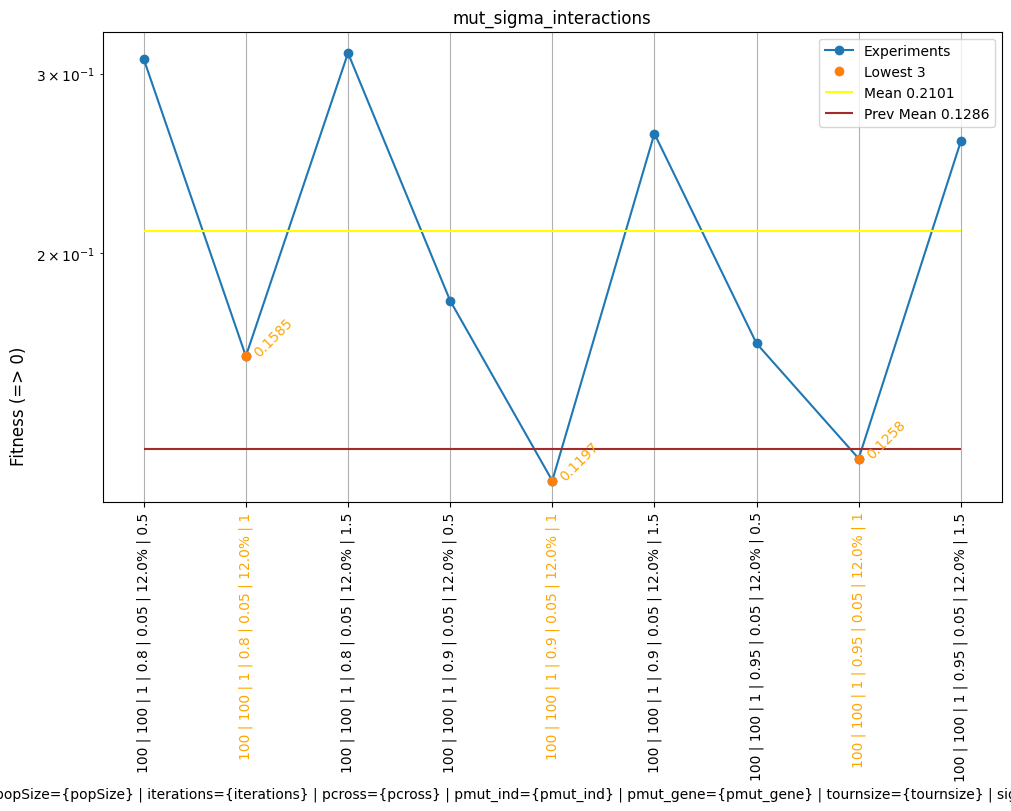

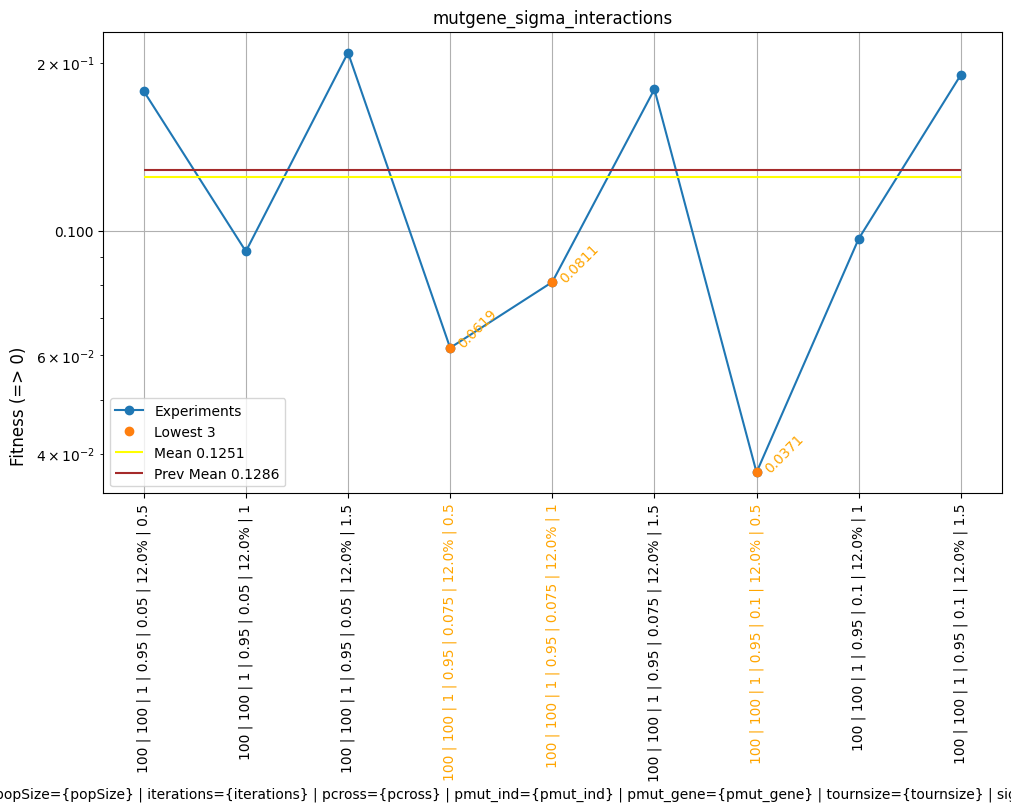

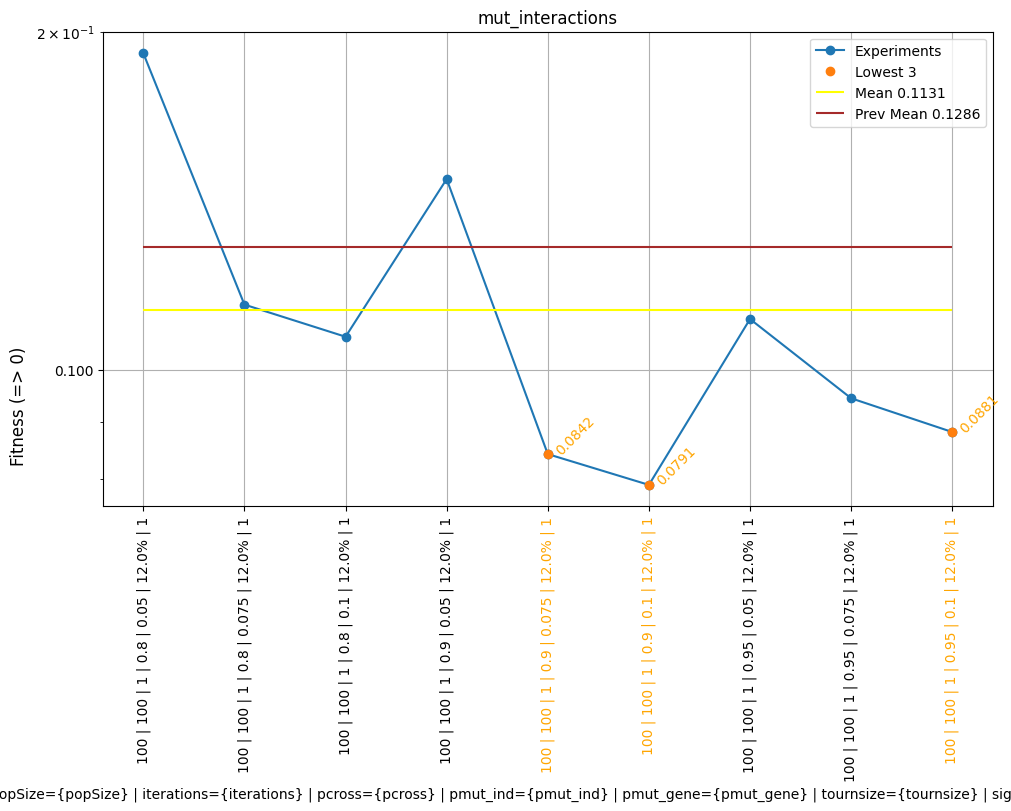

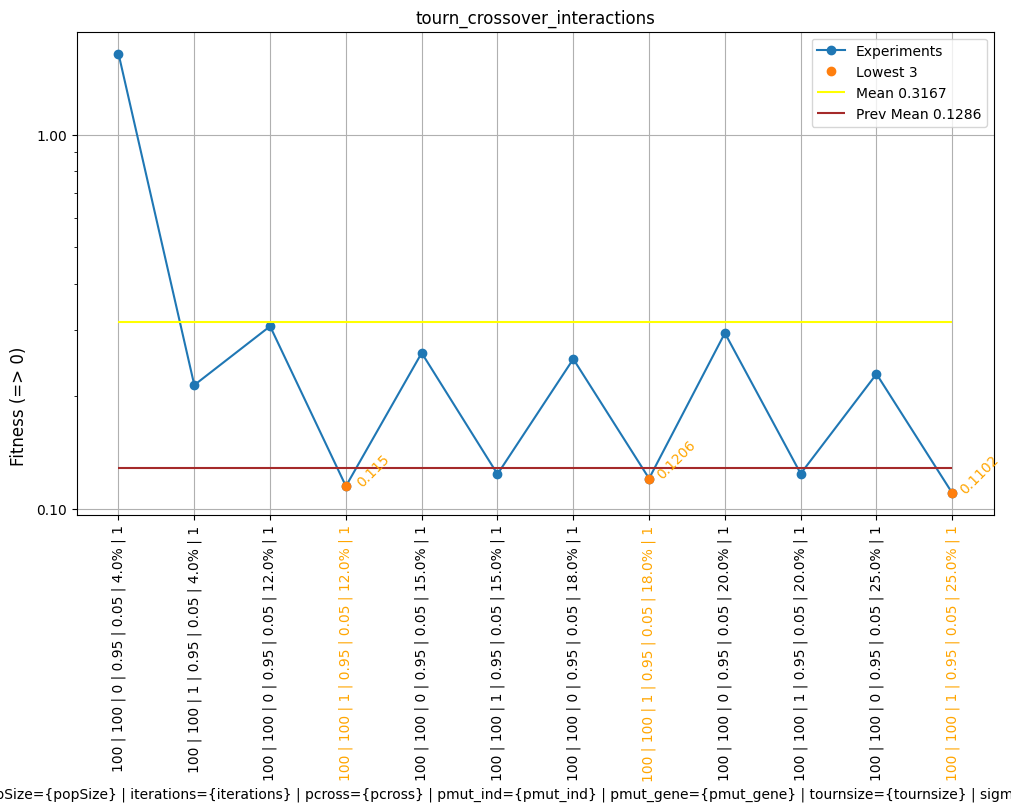

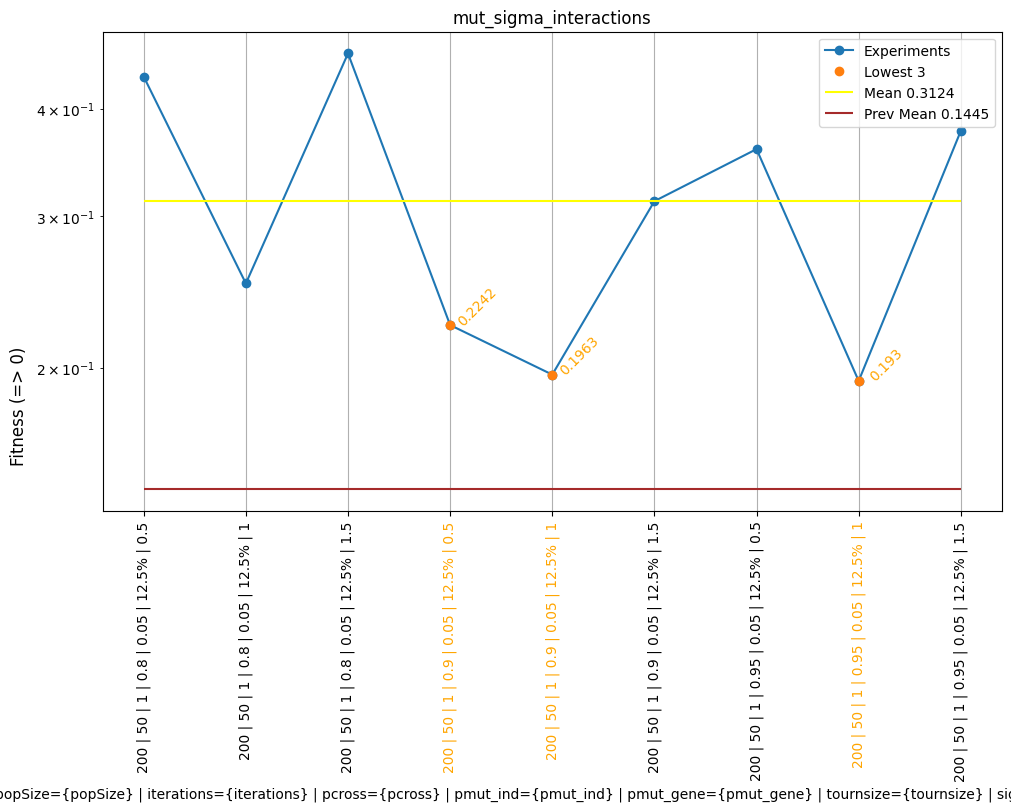

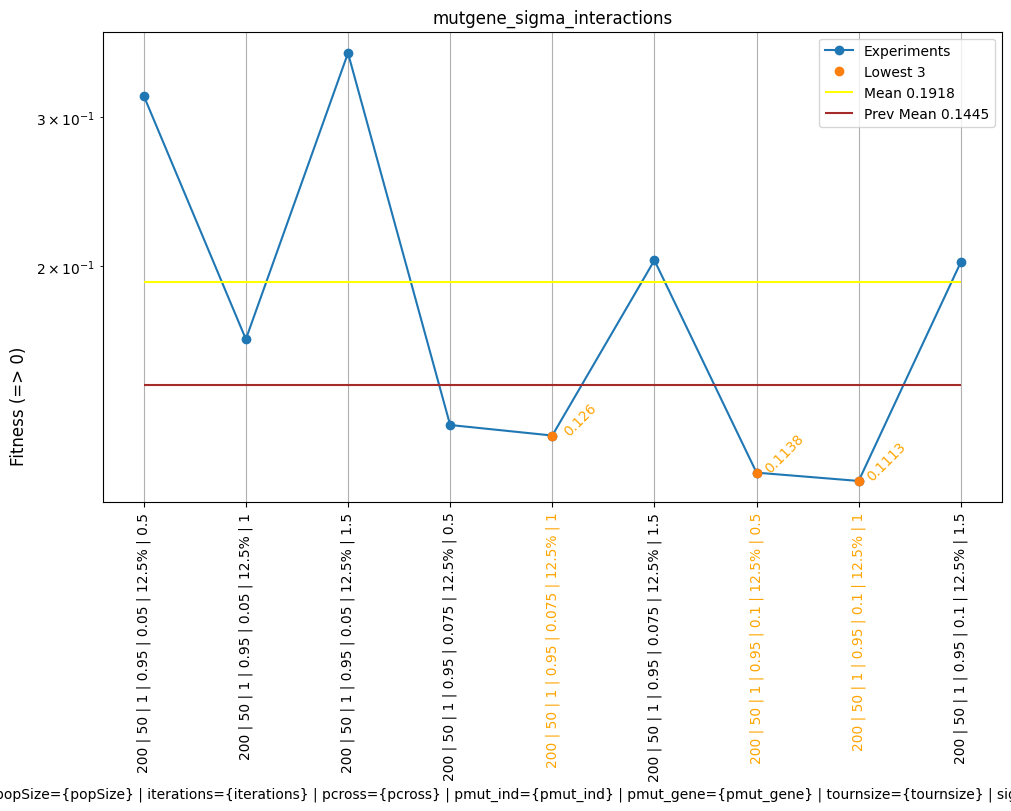

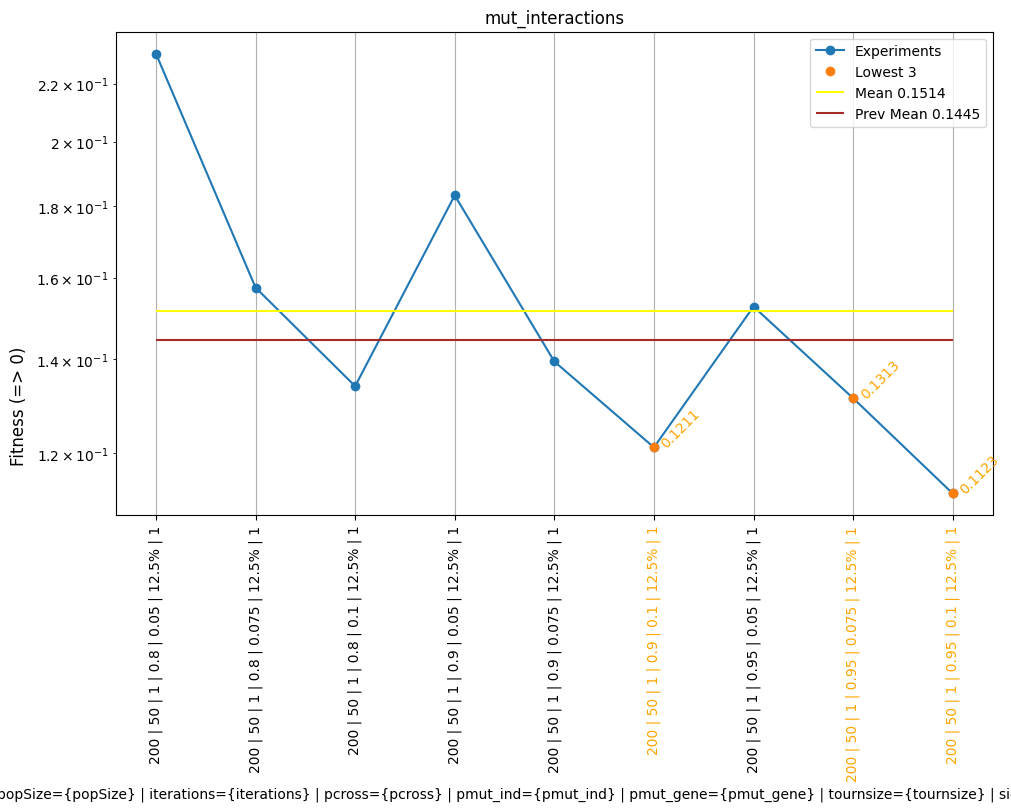

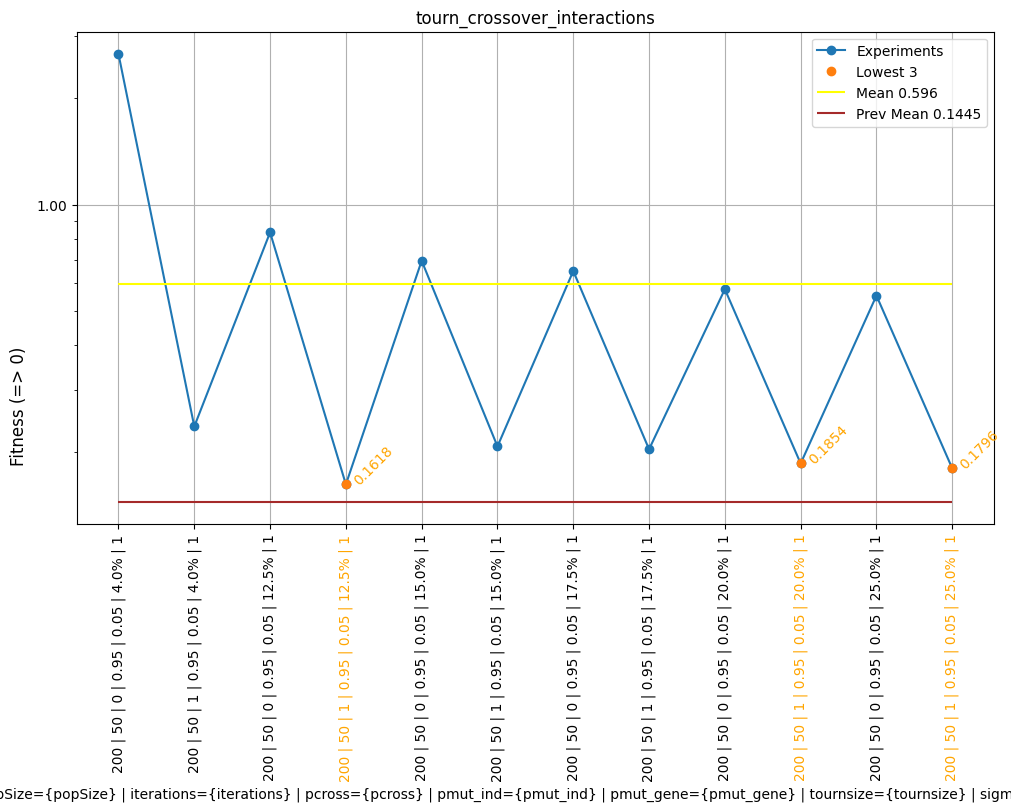

In [17]:
plot_logs("GA_Interaction-Sweeps_Logs")
plot_logs("GA_High-Population-Interaction-Sweeps_Logs")


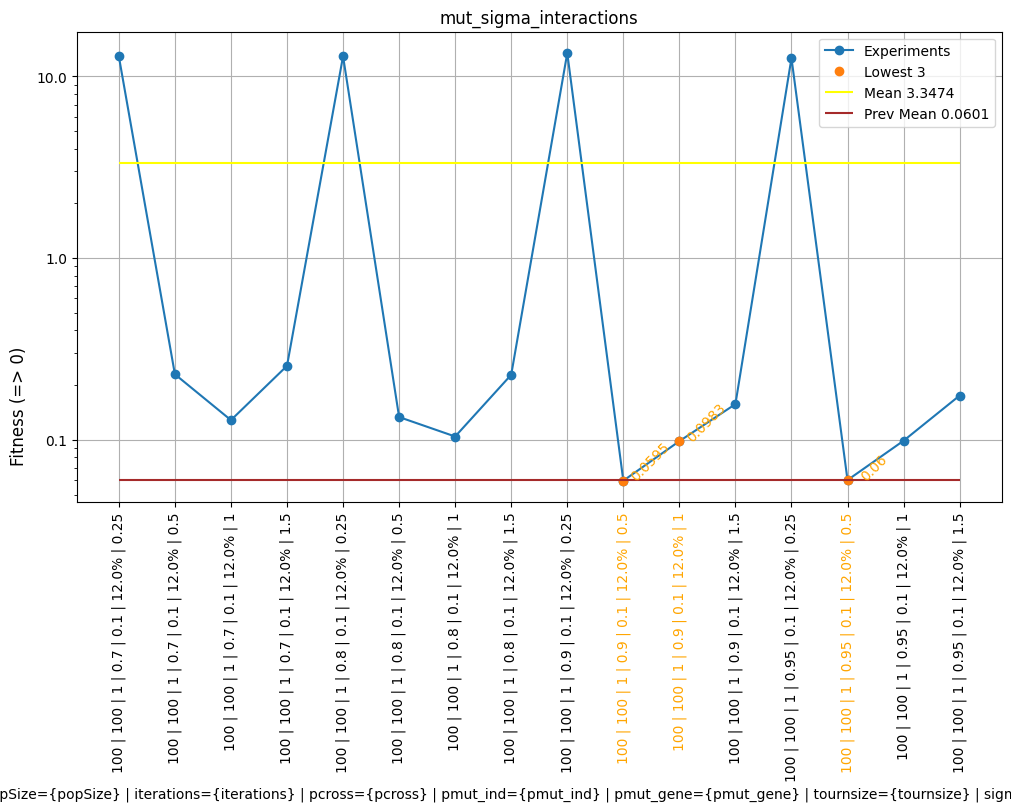

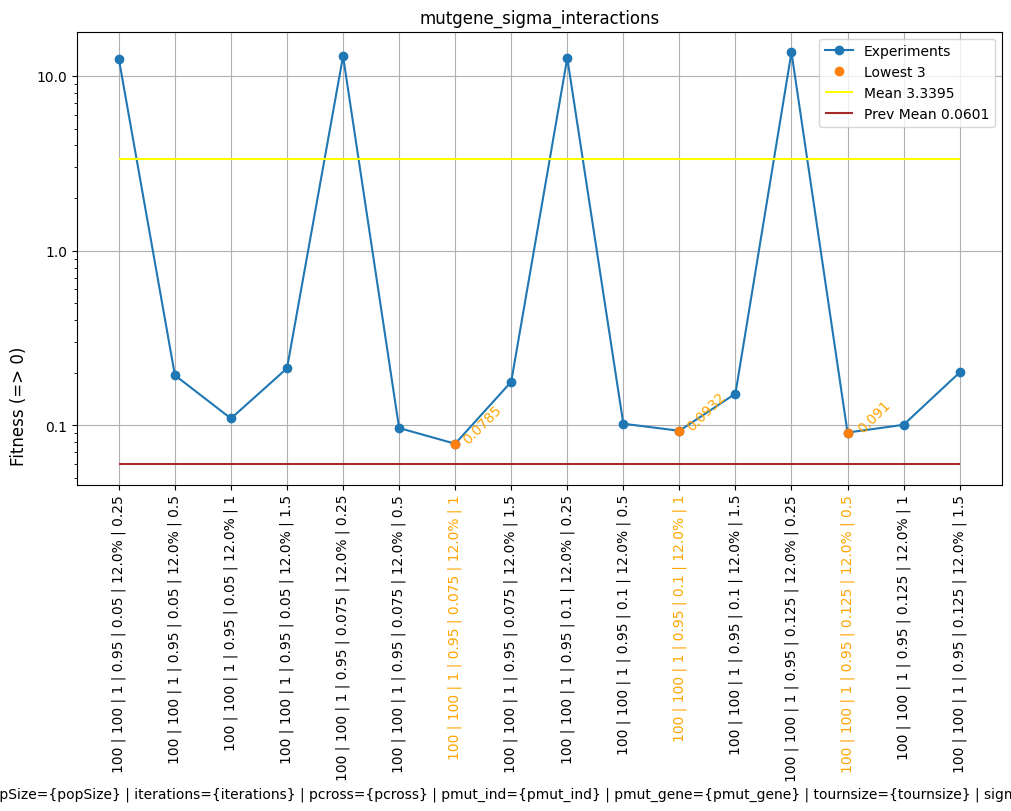

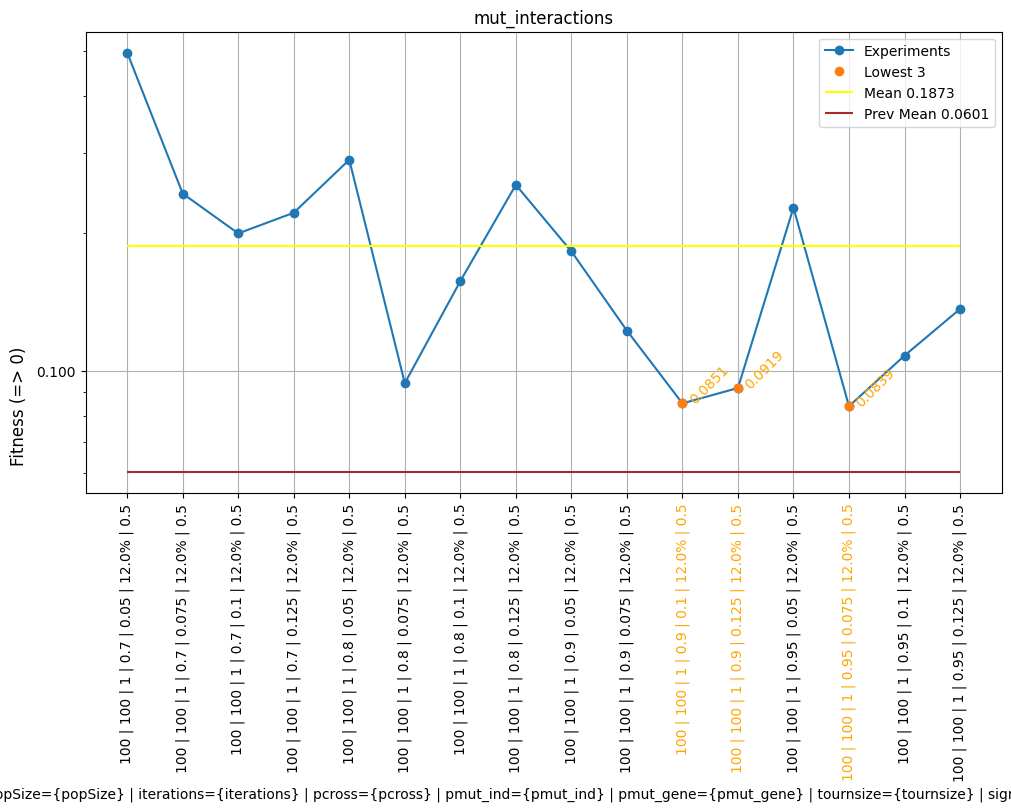

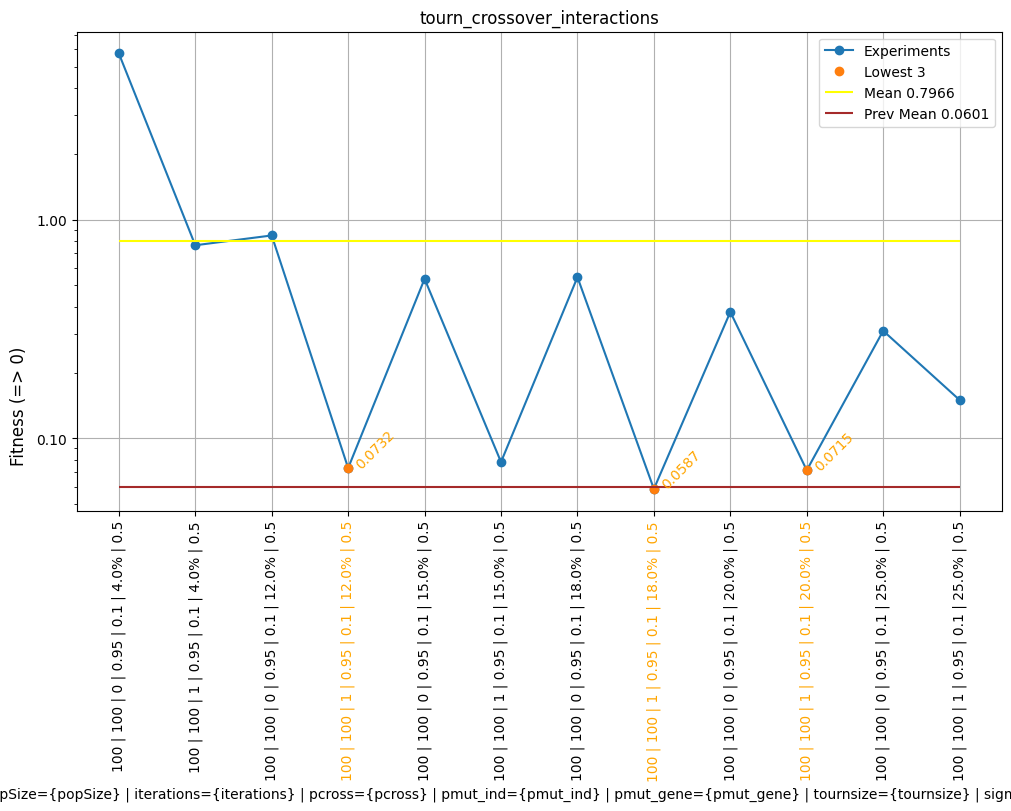

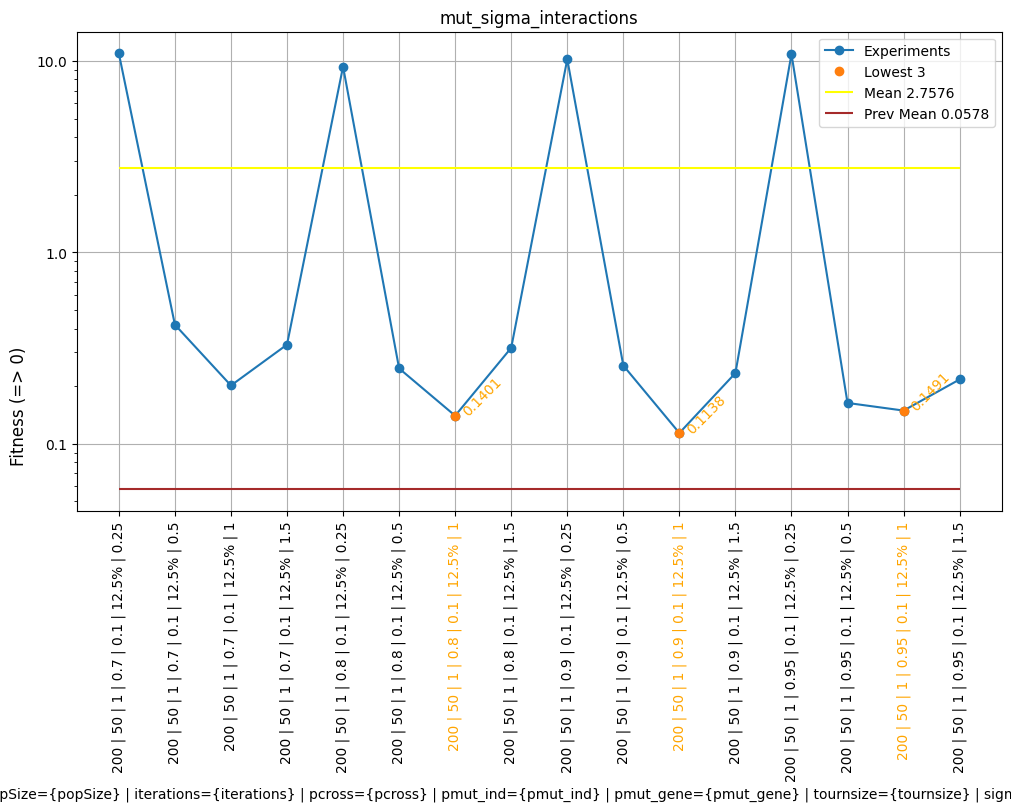

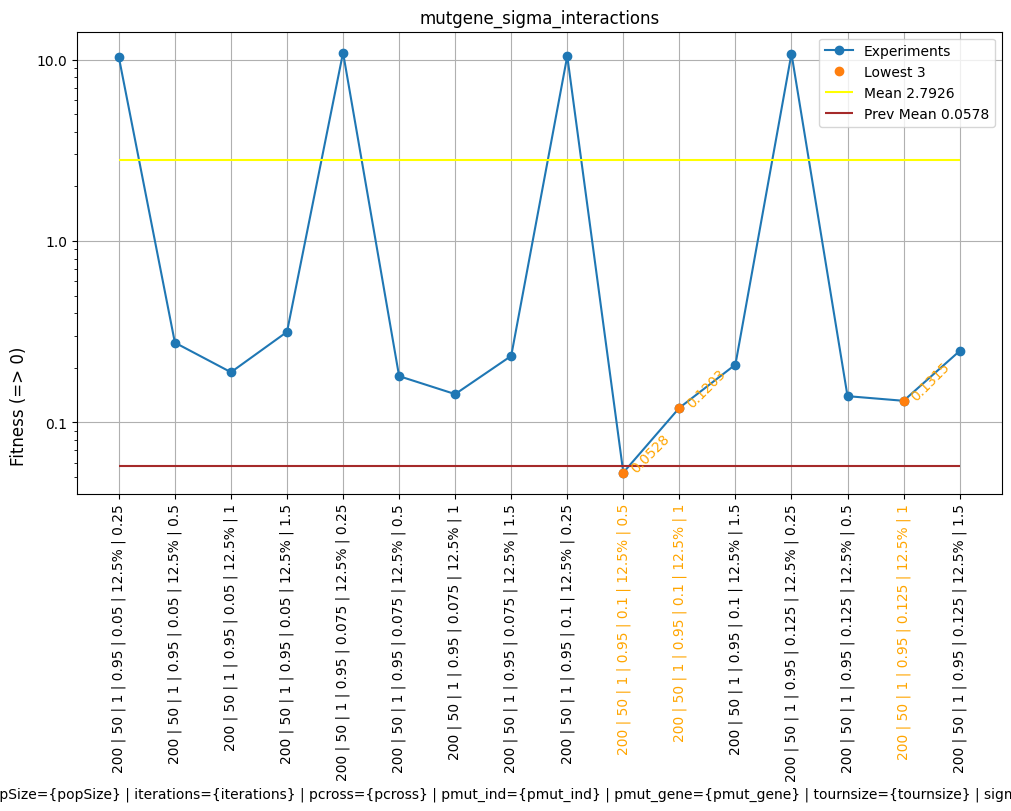

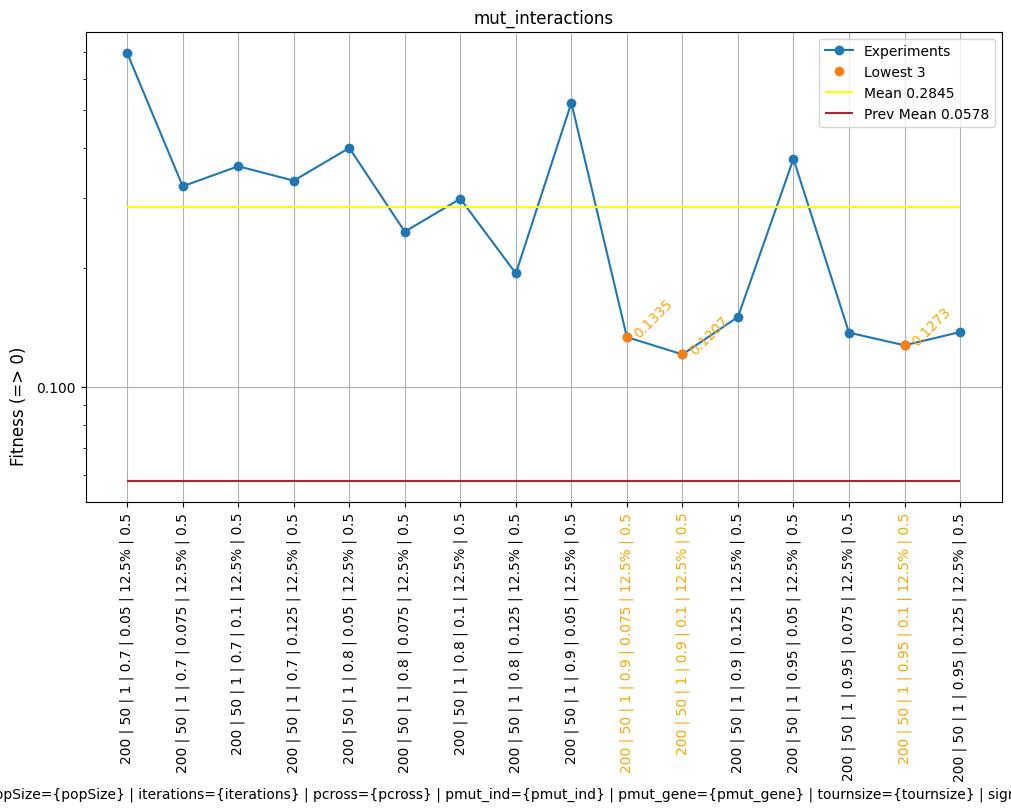

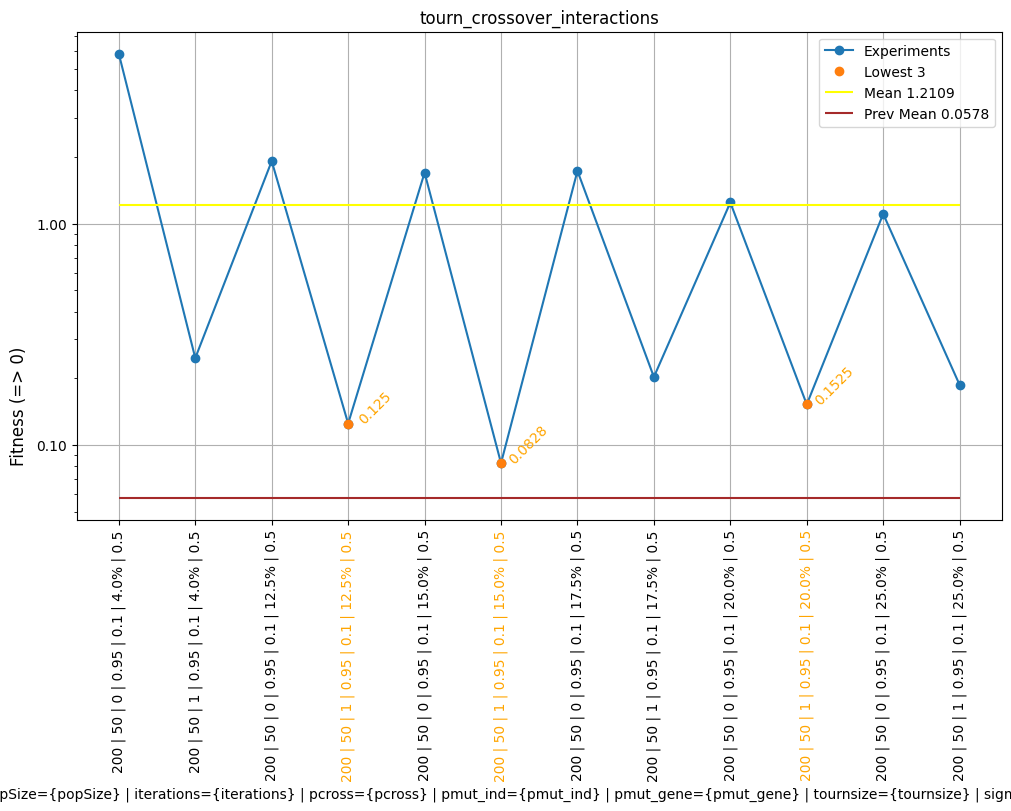

In [21]:
plot_logs("GA_Interaction-Sweeps2_Logs")
plot_logs("GA_High-Population-Interaction-Sweeps2_Logs")